In [1]:
import pandas as pd

In [2]:
import pyreadstat 

In [47]:
import warnings
warnings.filterwarnings('ignore')


## Import Datset

In [48]:
data,df=pyreadstat.read_sav("C:\\Users\\rezau\\Downloads\\Telegram Desktop\Data05 (2).sav")

In [49]:
data

,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,q_10,...,q_16,q_17,q_19,q_20,q_21,q_22,q_23,q_23.1,q_24,q_5c
0,3.0,27.0,2.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,...,115000.0,64.0,28.0,30.0,1.0,4.0,1.0,1.0,200.0,1.0
1,2.0,28.0,1.0,2.0,8.0,1.0,2.0,3.0,3.0,1.0,...,123000.0,70.0,44.0,15.0,0.0,1.0,1.0,2.0,175.0,1.0
2,1.0,49.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,1.0,...,233000.0,64.0,31.0,27.0,1.0,3.0,1.0,3.0,465.0,1.0
3,1.0,26.0,2.0,2.0,0.0,2.0,2.0,2.0,4.0,0.0,...,120000.0,63.0,33.0,14.0,1.0,4.0,1.0,1.0,400.0,0.0
4,2.0,27.0,2.0,1.0,6.0,2.0,1.0,0.0,2.0,1.0,...,47900.0,67.0,36.0,29.0,1.0,2.0,1.0,1.0,310.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2.0,21.0,1.0,1.0,6.0,1.0,1.0,3.0,5.0,0.0,...,77000.0,69.0,43.0,14.0,1.0,3.0,0.0,NaN,0.0,1.0
126,2.0,18.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,33000.0,66.0,35.0,22.0,1.0,3.0,1.0,1.0,340.0,0.0
127,3.0,36.0,1.0,1.0,0.0,1.0,4.0,5.0,5.0,1.0,...,97000.0,67.0,38.0,24.0,1.0,1.0,0.0,NaN,0.0,0.0
128,1.0,12.0,2.0,1.0,7.0,2.0,3.0,2.0,3.0,1.0,...,77000.0,74.0,37.0,17.0,1.0,2.0,1.0,1.0,532.0,1.0


## "q_20" columns takes for Converting to time series 

In [50]:
data1=data[['q_20']]
data1

,q_20
0,30.0
1,15.0
2,27.0
3,14.0
4,29.0
...,...
125,14.0
126,22.0
127,24.0
128,17.0


## checking null value

In [51]:
data1.isnull().sum()

q_20    0
dtype: int64

## change column name

In [52]:
data1.rename(columns={'q_20': 'National Integrity Score'},inplace=True)

In [53]:
data1

,National Integrity Score
0,30.0
1,15.0
2,27.0
3,14.0
4,29.0
...,...
125,14.0
126,22.0
127,24.0
128,17.0


In [54]:
rows=len(data1);rows

130

## converting rows to month 

In [55]:
date_index= pd.date_range(start='2015-01-01', periods=rows, freq='MS')

In [56]:
type(date_index)

pandas.core.indexes.datetimes.DatetimeIndex

## concating integrity value and dates

In [57]:
data1.index = date_index


In [58]:
data1

,National Integrity Score
2015-01-01,30.0
2015-02-01,15.0
2015-03-01,27.0
2015-04-01,14.0
2015-05-01,29.0
...,...
2025-06-01,14.0
2025-07-01,22.0
2025-08-01,24.0
2025-09-01,17.0


<Axes: >

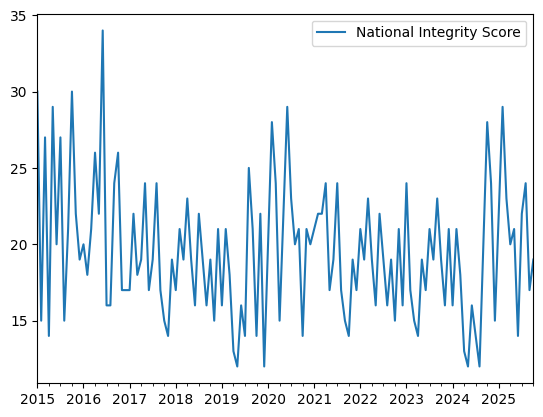

In [59]:
data1.plot(kind='line')

## Augmented Dickey-Fuller Test (checking wheather the data is stationary or not)

In [60]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['National Integrity Score'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


ADF Statistic: -10.94026526100937
p-value: 9.334629298175842e-20


In [64]:
#since p value is less then 0.05 so we may say that the data is stationary that is mean and variance is same over the time 

## forecasting the dataset with ARIMA for next 12 months

In [73]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1['National Integrity Score'], order=(1,1,1))
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=12)
forecast_arima

2025-11-01    19.579110
2025-12-01    19.575726
2026-01-01    19.575746
2026-02-01    19.575745
2026-03-01    19.575745
2026-04-01    19.575745
2026-05-01    19.575745
2026-06-01    19.575745
2026-07-01    19.575745
2026-08-01    19.575745
2026-09-01    19.575745
2026-10-01    19.575745
Freq: MS, Name: predicted_mean, dtype: float64

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model_ets = ExponentialSmoothing(data1['National Integrity Score'], trend='add', seasonal='add', seasonal_periods=12)
model_ets_fit = model_ets.fit()

# Forecast
forecast_ets = model_ets_fit.forecast(steps=12)


In [70]:
forecast_ets

2025-11-01    17.912405
2025-12-01    16.514271
2026-01-01    19.067227
2026-02-01    19.885617
2026-03-01    19.431257
2026-04-01    16.885794
2026-05-01    18.067860
2026-06-01    18.704299
2026-07-01    18.795413
2026-08-01    17.522768
2026-09-01    18.159263
2026-10-01    18.068552
Freq: MS, dtype: float64

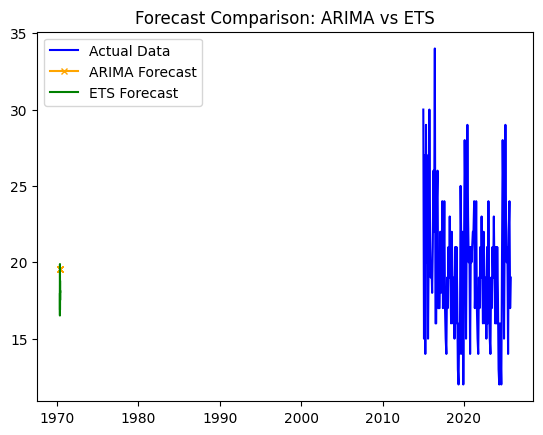

In [83]:
import matplotlib.pyplot as plt

# Plotting the original series
plt.plot(data1['National Integrity Score'], label='Actual Data', color='blue')

# Plotting ARIMA forecast
plt.plot(range(len(data1), len(data1)+12), forecast_arima, label='ARIMA Forecast', color='orange',marker='x', markersize=5)

# Plotting ETS forecast
plt.plot(range(len(data1), len(data1)+12), forecast_ets, label='ETS Forecast', color='green')

plt.legend()
plt.title('Forecast Comparison: ARIMA vs ETS')
plt.show()
